In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

def load_data_with_names(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {}
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("#"):
            row_name = line[1:].strip()
            if i + 1 < len(lines):
                data = list(map(float, lines[i + 1].strip().split()))
                data_dict[row_name] = data
    return data_dict

def plot_NO_yields(file_paths_N, file_paths_O, title, filename):
    plt.figure(figsize=(8, 6))
    # Sort both lists to ensure matching order
    file_paths_N.sort()
    file_paths_O.sort()
    plt.rc('font', family='serif')
    for path_N, path_O in zip(file_paths_N, file_paths_O):
        data_N = load_data_with_names(path_N)
        data_O = load_data_with_names(path_O)
        mass = np.array(data_N['mass'])
        N_eject_mass = np.array(data_N['N_eject_mass'])
        O_eject_mass = np.array(data_O['O_eject_mass'])
        # Try to get metallicity from the data, otherwise use filename
        label = data_N.get('metallicity', [None])[0]
        if label is None:
            label = os.path.basename(path_N)
        with np.errstate(divide='ignore', invalid='ignore'):
            NO_ratio = np.where(O_eject_mass > 0, N_eject_mass / O_eject_mass, np.nan)
            plt.plot(np.log10(mass[5:]), np.log10(NO_ratio[5:]), label=f'Z={label}')
    plt.xlabel('log stellar mass (M$_\odot$)', fontsize=14)
    plt.ylabel('log(N/O)', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

def plot_CO_yields(file_paths_C, file_paths_O, title, filename):
    plt.figure(figsize=(8, 6))
    # Sort both lists to ensure matching order
    file_paths_C.sort()
    file_paths_O.sort()
    plt.rc('font', family='serif')
    for path_C, path_O in zip(file_paths_C, file_paths_O):
        data_C = load_data_with_names(path_C)
        data_O = load_data_with_names(path_O)
        mass = np.array(data_C['mass'])
        C_eject_mass = np.array(data_C['C_eject_mass'])
        O_eject_mass = np.array(data_O['O_eject_mass'])
        # Try to get metallicity from the data, otherwise use filename
        label = data_C.get('metallicity', [None])[0]
        if label is None:
            label = os.path.basename(path_C)
        with np.errstate(divide='ignore', invalid='ignore'):
            CO_ratio = np.where(O_eject_mass > 0, C_eject_mass / O_eject_mass, np.nan)
            plt.plot(np.log10(mass[5:]), np.log10(CO_ratio[5:]), label=f'Z={label}')
    plt.xlabel('log stellar mass (M$_\odot$)', fontsize=14)
    plt.ylabel('log(C/O)', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

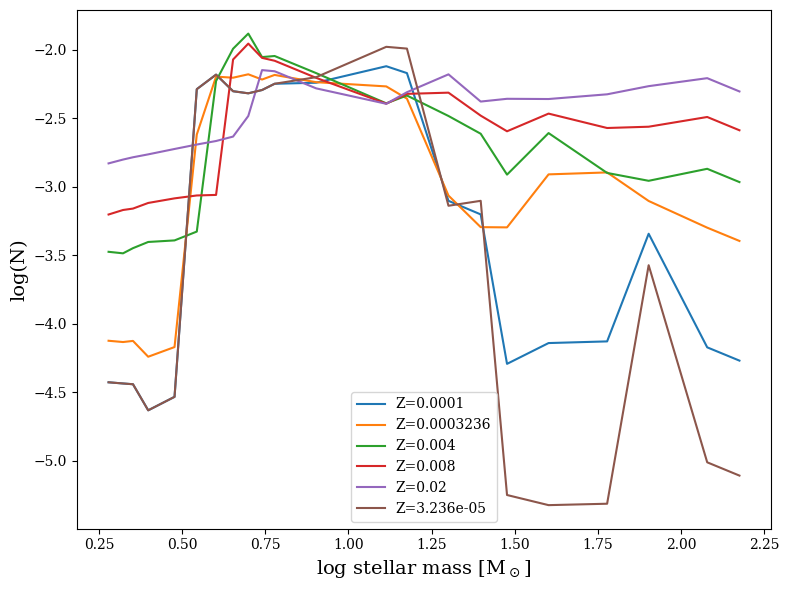

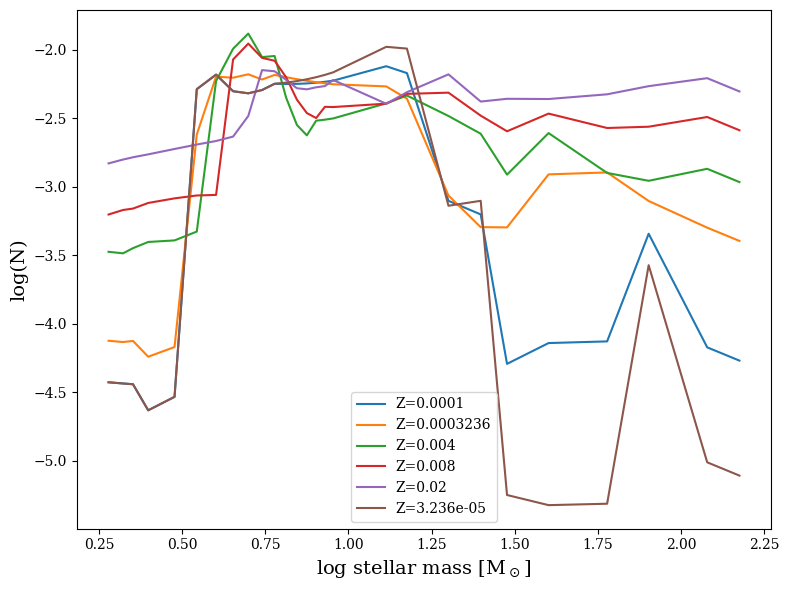

In [2]:
def plot_N_yields(file_paths_N):
    plt.figure(figsize=(8, 6))
    # Sort both lists to ensure matching order
    file_paths_N.sort()
    plt.rc('font', family='serif')
    for path_N in file_paths_N:
        data_N = load_data_with_names(path_N)
        mass = np.array(data_N['mass'])
        N_eject_mass = np.array(data_N['N_eject_mass'])
        # Try to get metallicity from the data, otherwise use filename
        label = data_N.get('metallicity', [None])[0]
        if label is None:
            label = os.path.basename(path_N)
        with np.errstate(divide='ignore', invalid='ignore'):
            plt.plot(np.log10(mass[5:]), np.log10(N_eject_mass[5:]), label=f'Z={label}')
    plt.xlabel('log stellar mass [M$_\odot$]', fontsize=14)
    plt.ylabel('log(N)', fontsize=14)
    plt.legend()
    plt.tight_layout()
    #plt.savefig('./figs/NO_yields.png', dpi=300)
    plt.show()

# Example usage:
file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R300/*.txt')
plot_N_yields(file_paths_N)
file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R300_sup_agb/*.txt')
plot_N_yields(file_paths_N)

**Low-Mass Regime (log M ≲ 0.5–0.7):**  
- In this region, the nitrogen yield is low and rises slowly with increasing stellar mass.
- These stars (roughly < 5 M☉) are not efficient at producing nitrogen. Most of their nitrogen comes from the initial composition (primary N) and is not significantly enhanced during their evolution.
- At the lowest masses, the yields are dominated by the initial metallicity and the CNO cycle operating at low efficiency.

**Intermediate-Mass Regime (log M ≈ 0.7–1.2):**  
- Here, the curve flattens or shows a modest increase.
- This mass range corresponds to intermediate-mass stars (AGB stars, ~4–8 M☉).
- These stars can produce significant amounts of nitrogen via the CNO cycle, especially through hot-bottom burning (HBB) during the AGB phase.
- The plateau or gentle rise reflects the onset and increasing efficiency of HBB, which converts carbon and oxygen into nitrogen.
- The metallicity dependence becomes more pronounced: higher metallicity stars have more initial C and O, fueling more secondary nitrogen production.

**Dip or Decrease (log M ≈ 1.2–1.5):**  
- Some curves show a dip or decrease in this region.
- This may be due to the transition between the most massive AGB stars and the onset of core-collapse supernovae.
- In this mass range, stars may lose their envelopes quickly or explode before significant nitrogen can be dredged up and ejected.
- The dip can also reflect uncertainties or gaps in stellar models for this transitional mass range.

**High-Mass Regime (log M ≳ 1.5):**  
- The curves rise steeply at high mass.
- These are massive stars (> 15–20 M☉), which can produce large amounts of nitrogen, especially at higher metallicity.
- Nitrogen production in massive stars is dominated by secondary processes: the CNO cycle is very efficient, and mass loss (via stellar winds) is stronger at higher Z, exposing and ejecting processed material.
- The steep rise and strong metallicity dependence reflect the increasing importance of secondary nitrogen production and stellar winds.

**Metallicity Effects (All Masses):**  
- At all masses, higher metallicity (Z) leads to higher nitrogen yields.
- This is because secondary nitrogen production (conversion of initial C and O into N) is more efficient when more C and O are present.
- At low Z, primary nitrogen (produced from initial H and He) dominates, so the yields are lower and less sensitive to mass.

**Scatter at Extremes:**  
- At the lowest and highest masses, the curves may show more scatter due to fewer model points, greater uncertainties in stellar evolution, and the sensitivity of yields to model assumptions (e.g., mass loss rates, convection, rotation).

---

**Summary Table:**

| Curve Region         | Stellar Mass Range      | Main Process                | Nitrogen Production | Metallicity Effect         |
|----------------------|------------------------|-----------------------------|---------------------|---------------------------|
| Low-mass            | < 4–5 M☉               | CNO cycle (low efficiency)  | Low                 | Weak                      |
| Intermediate-mass   | 4–8 M☉ (AGB)           | Hot-bottom burning (HBB)    | Moderate            | Stronger (secondary N)    |
| Dip/Transition      | 8–12 M☉                | Envelope loss/SN transition | Variable/Low        | Model-dependent           |
| High-mass           | > 15–20 M☉             | CNO cycle, winds, SN        | High                | Very strong (secondary N) |

---

**Physical Interpretation:**  
- The shape of each curve is a direct result of how different mass stars process and eject nitrogen, and how this depends on their initial metallicity.
- The plateau and dip regions mark the transition from AGB to massive star behavior.
- The steep rise at high mass and high Z is a hallmark of secondary nitrogen production in massive stars with strong winds.

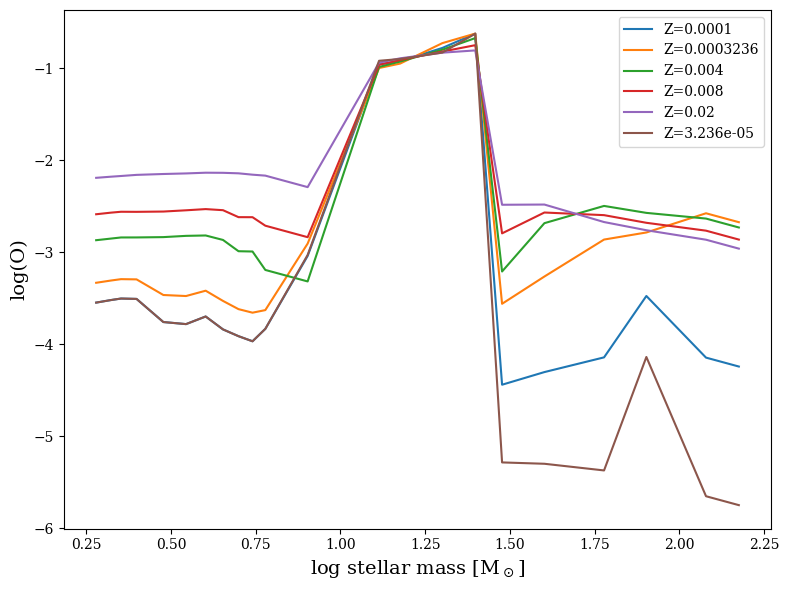

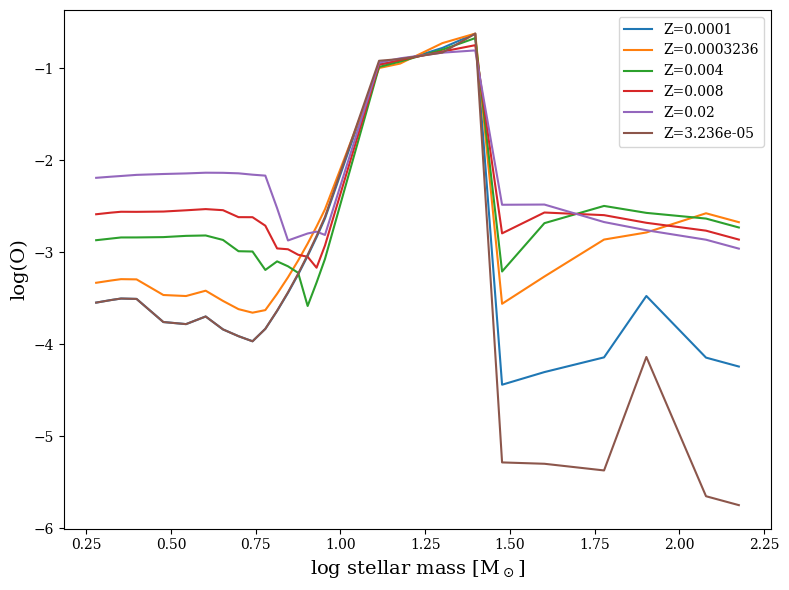

In [3]:
def plot_O_yields(file_paths_O):
    plt.figure(figsize=(8, 6))
    # Sort both lists to ensure matching order
    file_paths_O.sort()
    plt.rc('font', family='serif')
    for path_O in file_paths_O:
        data_O = load_data_with_names(path_O)
        mass = np.array(data_O['mass'])
        O_eject_mass = np.array(data_O['O_eject_mass'])
        # Try to get metallicity from the data, otherwise use filename
        label = data_O.get('metallicity', [None])[0]
        if label is None:
            label = os.path.basename(path_O)
        with np.errstate(divide='ignore', invalid='ignore'):
            plt.plot(np.log10(mass[5:]), np.log10(O_eject_mass[5:]), label=f'Z={label}')
    plt.xlabel('log stellar mass [M$_\odot$]', fontsize=14)
    plt.ylabel('log(O)', fontsize=14)
    plt.legend()
    plt.tight_layout()
    #plt.savefig('./figs/NO_yields.png', dpi=300)
    plt.show()

file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300/*.txt')
plot_O_yields(file_paths_O)
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300_sup_agb/*.txt')
plot_O_yields(file_paths_O)

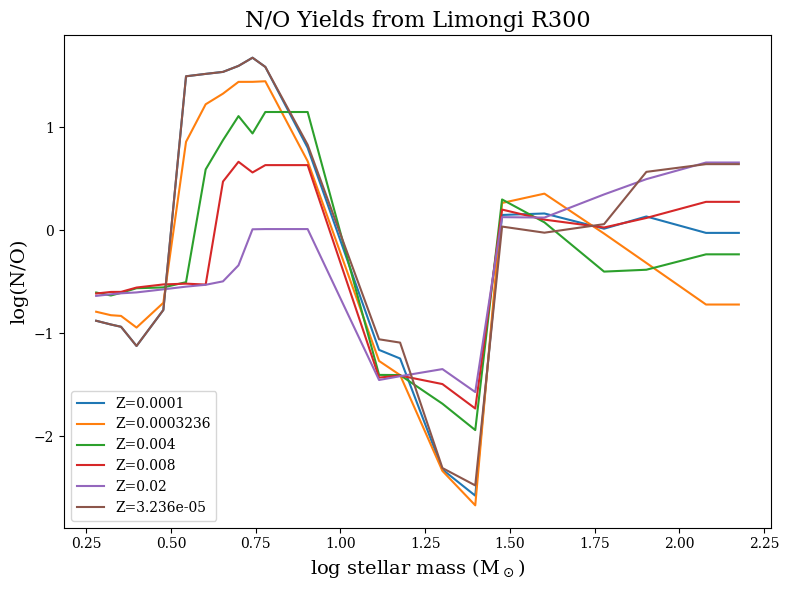

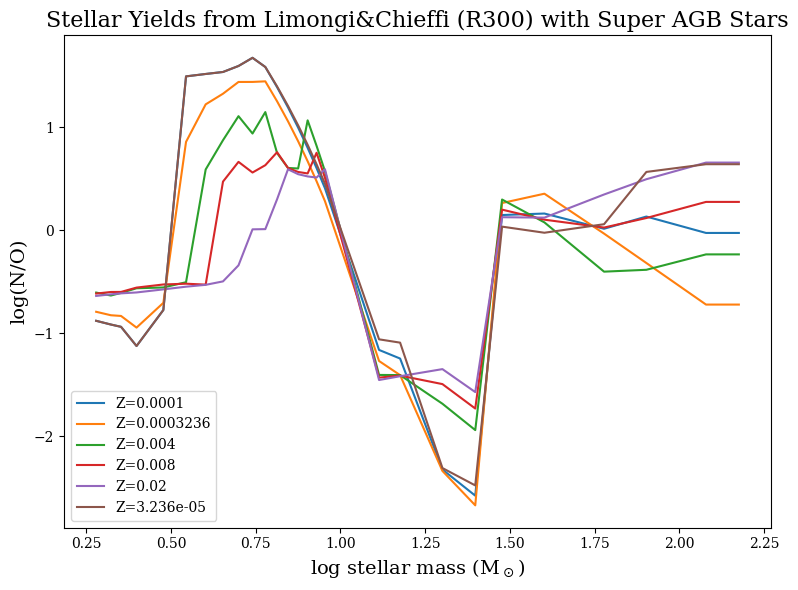

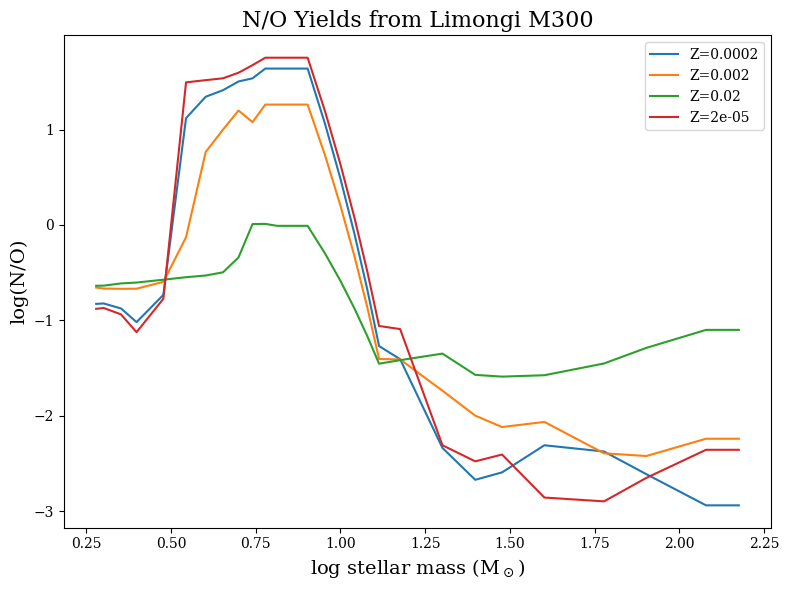

In [4]:
file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R300/*.txt')
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300/*.txt')
plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi R300', filename='/Users/adriana_work/Desktop/galIMF/figs/yield_plots/NO_yields_Limongi_R300.png')

file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R300_sup_agb/*.txt')
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300_sup_agb/*.txt')
plot_NO_yields(file_paths_N, file_paths_O, title='Stellar Yields from Limongi&Chieffi (R300) with Super AGB Stars', filename='/Users/adriana_work/Desktop/galIMF/figs/yield_plots/NO_yields_Limongi_R300_sup_agb.png')

file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_M300/*.txt')
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_M300/*.txt')
plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi M300', filename='/Users/adriana_work/Desktop/galIMF/figs/yield_plots/NO_yields_Limongi_M300.png')

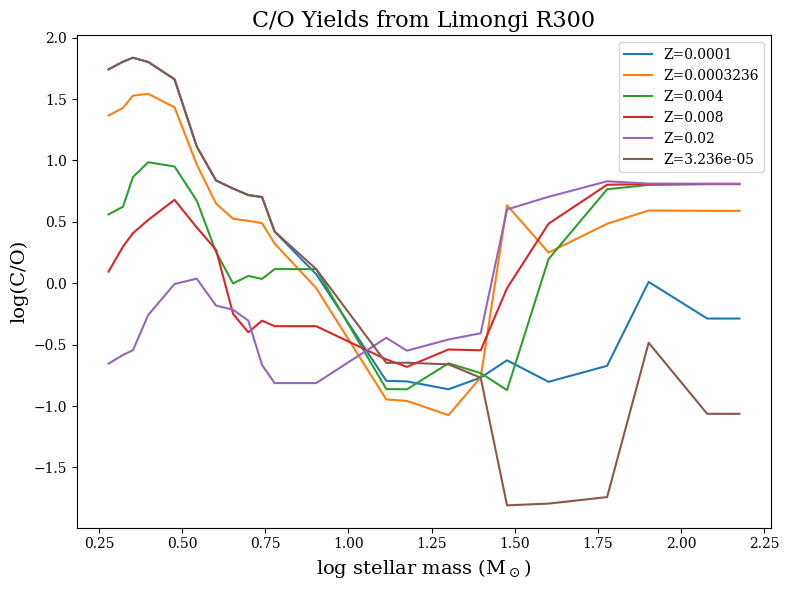

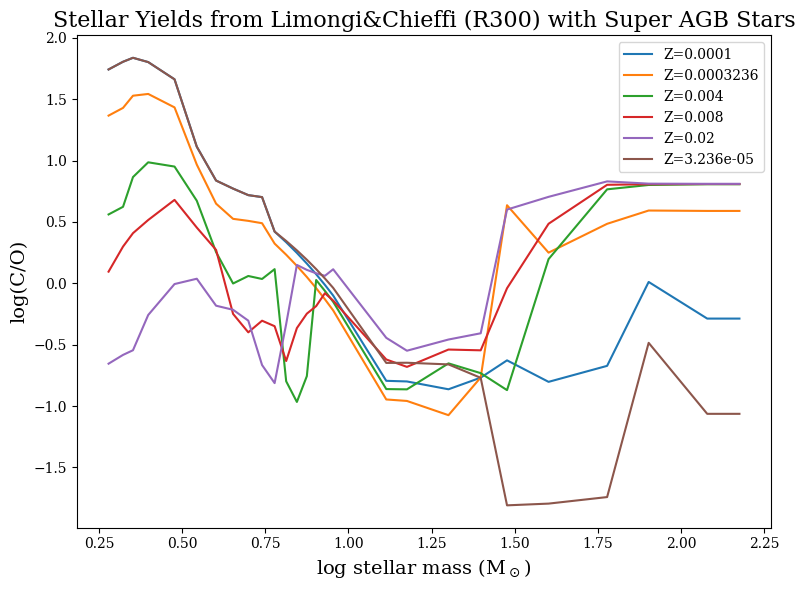

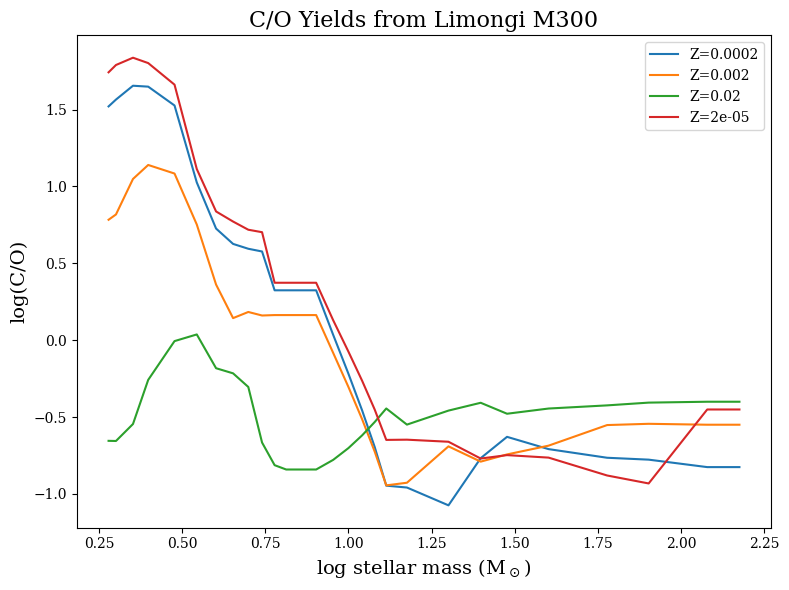

In [6]:
file_paths_C = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_C_eject_mass_from_Limongi_R300/*.txt')
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300/*.txt')
plot_CO_yields(file_paths_C, file_paths_O, title='C/O Yields from Limongi R300', filename='/Users/adriana_work/Desktop/galIMF/figs/yield_plots/CO_yields_Limongi_R300.png')

file_paths_C = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_C_eject_mass_from_Limongi_R300_sup_agb/*.txt')
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300_sup_agb/*.txt')
plot_CO_yields(file_paths_C, file_paths_O, title='Stellar Yields from Limongi&Chieffi (R300) with Super AGB Stars', filename='/Users/adriana_work/Desktop/galIMF/figs/yield_plots/CO_yields_Limongi_R300_sup_agb.png')

file_paths_C = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_C_eject_mass_from_Limongi_M300/*.txt')
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_M300/*.txt')
plot_CO_yields(file_paths_C, file_paths_O, title='C/O Yields from Limongi M300', filename='/Users/adriana_work/Desktop/galIMF/figs/yield_plots/CO_yields_Limongi_M300.png')

In [7]:
# file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R150/*.txt')
# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R150/*.txt')
# plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi R150', filename='./figs/NO_yields_Limongi_R150.png')

# file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R150_sup_agb/*.txt')
# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R150_sup_agb/*.txt')
# plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi R150 with sup agb', filename='./figs/NO_yields_Limongi_R150_sup_agb.png')

# file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_M150/*.txt')
# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_M150/*.txt')
# plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi M150', filename='./figs/NO_yields_Limongi_M150.png')

In [8]:
# file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R000/*.txt')
# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R000/*.txt')
# plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi R000', filename='./figs/NO_yields_Limongi_R000.png')

# file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R000_sup_agb/*.txt')
# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R000_sup_agb/*.txt')
# plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi R000 with sup agb', filename='./figs/NO_yields_Limongi_R000_sup_agb.png')


# file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_M000/*.txt')
# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_M000/*.txt')
# plot_NO_yields(file_paths_N, file_paths_O, title='N/O Yields from Limongi M000', filename='./figs/NO_yields_Limongi_M000.png')

In [9]:
# def plot_O_yields(file_paths_O, filename):
#     plt.figure(figsize=(8, 6))
#     # Sort both lists to ensure matching order
#     file_paths_O.sort()
#     plt.rc('font', family='serif')
#     for path_O in file_paths_O:
#         data_O = load_data_with_names(path_O)
#         mass = np.array(data_O['mass'])
#         O_eject_mass = np.array(data_O['H_eject_mass'])
#         # Try to get metallicity from the data, otherwise use filename
#         label = data_O.get('metallicity', [None])[0]
#         if label is None:
#             label = os.path.basename(path_O)
#         with np.errstate(divide='ignore', invalid='ignore'):
#             plt.plot(np.log10(mass[5:]), np.log10(O_eject_mass[5:]), label=f'Z={label}')
#     plt.xlabel('log stellar mass [M$_\odot$]', fontsize=14)
#     plt.ylabel('log(H)', fontsize=14)
#     plt.legend()
#     plt.tight_layout()
#     plt.savefig(filename, dpi=300)
#     plt.show()

# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_H_eject_mass_from_Limongi_R300/*.txt')
# plot_O_yields(file_paths_O, filename='./figs/H_Limongi_R300.png')
# file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_H_eject_mass_from_Limongi_R300_sup_agb/*.txt')
# plot_O_yields(file_paths_O, filename='./figs/H_Limongi_R300_sup_agb.png')

In [10]:
import numpy as np
from scipy.integrate import quad
import IMFs.Kroupa_IMF as kroupa_imf

def get_kroupa_imf(alpha3=None):
    """Return a Kroupa IMF callable configured with the requested high-mass slope."""
    if alpha3 is not None:
        kroupa_imf.alpha3 = float(alpha3)
        kroupa_imf.integrated_mass = quad(kroupa_imf.mass_function, 0.08, 150, limit=50)[0]
    return kroupa_imf.custom_imf

def imf_weighted_yield_from_table(mass, yield_m, imf_func=None, mmin=None, mmax=None):
    """Integrate tabulated stellar yields against an IMF and return yield per formed stellar mass."""
    mass = np.asarray(mass, dtype=float)
    yield_m = np.asarray(yield_m, dtype=float)
    if imf_func is None:
        imf_func = kroupa_imf.custom_imf

    mask = np.isfinite(mass) & np.isfinite(yield_m)
    mass = mass[mask]
    yield_m = yield_m[mask]
    if mass.size == 0:
        return np.nan

    lower = mmin if mmin is not None else mass.min()
    upper = mmax if mmax is not None else mass.max()
    select = (mass >= lower) & (mass <= upper)
    mass = mass[select]
    yield_m = yield_m[select]
    if mass.size == 0:
        return np.nan

    xi = np.array([imf_func(m) for m in mass], dtype=float)
    num = np.trapz(yield_m * xi, mass)
    den = np.trapz(mass * xi, mass)
    return np.nan if den == 0 else num / den

def _cumulative_trapezoid(y, x):
    """Return cumulative trapezoidal integral with the same length as the input arrays."""
    if y.size == 0:
        return np.array([], dtype=float)
    if y.size == 1:
        return np.array([0.0], dtype=float)
    delta_x = np.diff(x)
    traps = 0.5 * (y[:-1] + y[1:]) * delta_x
    return np.concatenate(([0.0], np.cumsum(traps)))

def imf_weighted_ratio_vs_mass(mass, yield_num, yield_den, imf_func=None, mmin=None, mmax=None,
                                weighting_mode='cumulative'):
    """Return log10(N/O) under the requested IMF weighting mode.

    Parameters
    ----------
    mass, yield_num, yield_den : array-like
        Tabulated stellar masses and corresponding N and O ejecta.
    imf_func : callable, optional
        IMF weighting function. Defaults to the current Kroupa IMF implementation.
    mmin, mmax : float, optional
        Optional limits on the stellar mass range over which to compute the ratio.
    weighting_mode : {'cumulative', 'pointwise'}
        'cumulative' (default) integrates the IMF-weighted yields from the lowest
        mass upward. 'pointwise' returns the instantaneous (N/O) at each tabulated
        mass and is useful for consistency checks with the original unweighted plots.
    """
    if weighting_mode not in {'cumulative', 'pointwise'}:
        raise ValueError(f"Unknown weighting_mode: {weighting_mode}")

    mass = np.asarray(mass, dtype=float)
    yield_num = np.asarray(yield_num, dtype=float)
    yield_den = np.asarray(yield_den, dtype=float)
    if imf_func is None:
        imf_func = kroupa_imf.custom_imf

    mask = np.isfinite(mass) & np.isfinite(yield_num) & np.isfinite(yield_den)
    if mask.sum() == 0:
        empty = np.array([], dtype=float)
        return {
            'mass': empty,
            'log_NO': empty,
            'xi': empty,
            'weighted_num': empty,
            'weighted_den': empty,
            'cum_weighted_num': empty,
            'cum_weighted_den': empty,
            'weighting_mode': weighting_mode,
        }

    mass = mass[mask]
    yield_num = yield_num[mask]
    yield_den = yield_den[mask]

    lower = mmin if mmin is not None else mass.min()
    upper = mmax if mmax is not None else mass.max()
    select = (mass >= lower) & (mass <= upper)
    mass = mass[select]
    yield_num = yield_num[select]
    yield_den = yield_den[select]
    if mass.size == 0:
        empty = np.array([], dtype=float)
        return {
            'mass': empty,
            'log_NO': empty,
            'xi': empty,
            'weighted_num': empty,
            'weighted_den': empty,
            'cum_weighted_num': empty,
            'cum_weighted_den': empty,
            'weighting_mode': weighting_mode,
        }

    order = np.argsort(mass)
    mass = mass[order]
    yield_num = yield_num[order]
    yield_den = yield_den[order]

    xi = np.array([imf_func(m) for m in mass], dtype=float)
    weighted_num = yield_num * xi
    weighted_den = yield_den * xi

    if weighting_mode == 'pointwise':
        with np.errstate(divide='ignore', invalid='ignore'):
            ratio = np.where((weighted_den > 0) & (weighted_num > 0),
                             weighted_num / weighted_den, np.nan)
            log_NO = np.log10(ratio)
        return {
            'mass': mass,
            'log_NO': log_NO,
            'xi': xi,
            'weighted_num': weighted_num,
            'weighted_den': weighted_den,
            'cum_weighted_num': np.array([], dtype=float),
            'cum_weighted_den': np.array([], dtype=float),
            'weighting_mode': weighting_mode,
        }

    cum_weighted_num = _cumulative_trapezoid(weighted_num, mass)
    cum_weighted_den = _cumulative_trapezoid(weighted_den, mass)
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.where((cum_weighted_den > 0) & (cum_weighted_num > 0),
                         cum_weighted_num / cum_weighted_den, np.nan)
        log_NO = np.log10(ratio)

    return {
        'mass': mass,
        'log_NO': log_NO,
        'xi': xi,
        'weighted_num': weighted_num,
        'weighted_den': weighted_den,
        'cum_weighted_num': cum_weighted_num,
        'cum_weighted_den': cum_weighted_den,
        'weighting_mode': weighting_mode,
    }



In [11]:
def plot_imf_weighted_NO_vs_mass(file_paths_N, file_paths_O, alpha3, title, start_index=5,
                                 mmin=None, mmax=None, imf_func=None, apply_imf_weights=True,
                                 weighting_mode='cumulative'):
    """Plot log10(N/O) against log10(stellar mass) with optional IMF weighting."""
    if len(file_paths_N) != len(file_paths_O):
        raise ValueError(f"Expected the same number of N and O files, got {len(file_paths_N)} and {len(file_paths_O)}.")

    if not apply_imf_weights:
        imf_func = (lambda mass_value: 1.0)
        weighting_mode = 'pointwise'
    else:
        imf_func = imf_func or get_kroupa_imf(alpha3)

    paths_N = sorted(file_paths_N)
    paths_O = sorted(file_paths_O)
    fig, ax = plt.subplots(figsize=(8, 6))
    results = []

    for path_N, path_O in zip(paths_N, paths_O):
        data_N = load_data_with_names(path_N)
        data_O = load_data_with_names(path_O)
        mass_N = np.asarray(data_N['mass'], dtype=float)
        mass_O = np.asarray(data_O['mass'], dtype=float)
        if not np.allclose(mass_N, mass_O):
            raise ValueError(f"Mass grids do not match for {path_N} and {path_O}.")

        ratio_data = imf_weighted_ratio_vs_mass(
            mass_N,
            data_N['N_eject_mass'],
            data_O['O_eject_mass'],
            imf_func=imf_func,
            mmin=mmin,
            mmax=mmax,
            weighting_mode=weighting_mode,
        )
        if ratio_data['mass'].size == 0:
            continue

        metallicity_vals = data_N.get('metallicity') or data_O.get('metallicity')
        metallicity = float(metallicity_vals[0]) if metallicity_vals else np.nan
        label_text = metallicity_vals[0] if metallicity_vals else os.path.basename(path_N)

        log_mass = np.log10(ratio_data['mass'])
        log_NO = ratio_data['log_NO']
        indices = np.arange(log_NO.size)
        valid = np.isfinite(log_mass) & np.isfinite(log_NO)
        if start_index is not None:
            valid &= indices >= start_index

        if not np.any(valid):
            continue

        ax.plot(log_mass[valid], log_NO[valid], label=f'Z={label_text}')

        pN = imf_weighted_yield_from_table(mass_N, data_N['N_eject_mass'], imf_func, mmin=mmin, mmax=mmax)
        pO = imf_weighted_yield_from_table(mass_O, data_O['O_eject_mass'], imf_func, mmin=mmin, mmax=mmax)

        results.append({
            'metallicity': metallicity,
            'label': label_text,
            'log_mass': log_mass[valid],
            'log_NO': log_NO[valid],
            'pN': pN,
            'pO': pO,
            'weighting_mode': weighting_mode,
        })

    if not results:
        print('No valid data found for plotting.')
        return []

    ax.set_xlabel('log stellar mass [M$_\odot$]', fontsize=14)
    ax.set_ylabel('log(N/O)', fontsize=14)
    if apply_imf_weights:
        ax.set_title(f"{title} Kroupa IMF with alpha3 = {alpha3:.2f}", fontsize=16)
    else:
        ax.set_title(f"{title} IMF weighting disabled", fontsize=16)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f"./figs/yield_plots/LC18_R300_NO_yields_{alpha3:.2f}.png", dpi=300)
    plt.show()
    return results


def summarize_imf_weighted_yields(file_paths_N, file_paths_O, alpha3, mmin=None, mmax=None,
                                  imf_func=None, apply_imf_weights=True):
    """Return integrated IMF-weighted N and O yields for each metallicity grid."""
    if len(file_paths_N) != len(file_paths_O):
        raise ValueError(f"Expected the same number of N and O files, got {len(file_paths_N)} and {len(file_paths_O)}.")

    if not apply_imf_weights:
        imf_func = (lambda mass_value: 1.0)
    else:
        imf_func = imf_func or get_kroupa_imf(alpha3)

    summaries = []
    for path_N, path_O in zip(sorted(file_paths_N), sorted(file_paths_O)):
        data_N = load_data_with_names(path_N)
        data_O = load_data_with_names(path_O)
        mass_N = np.asarray(data_N['mass'], dtype=float)
        mass_O = np.asarray(data_O['mass'], dtype=float)
        if not np.allclose(mass_N, mass_O):
            raise ValueError(f"Mass grids do not match for {path_N} and {path_O}.")

        pN = imf_weighted_yield_from_table(mass_N, data_N['N_eject_mass'], imf_func, mmin=mmin, mmax=mmax)
        pO = imf_weighted_yield_from_table(mass_O, data_O['O_eject_mass'], imf_func, mmin=mmin, mmax=mmax)
        metallicity_vals = data_N.get('metallicity') or data_O.get('metallicity')
        metallicity = float(metallicity_vals[0]) if metallicity_vals else np.nan

        summaries.append({
            'metallicity': metallicity,
            'label': metallicity_vals[0] if metallicity_vals else os.path.basename(path_N),
            'pN': pN,
            'pO': pO,
            'log_NO': np.log10(pN / pO) if pN > 0 and pO > 0 else np.nan,
        })

    return summaries

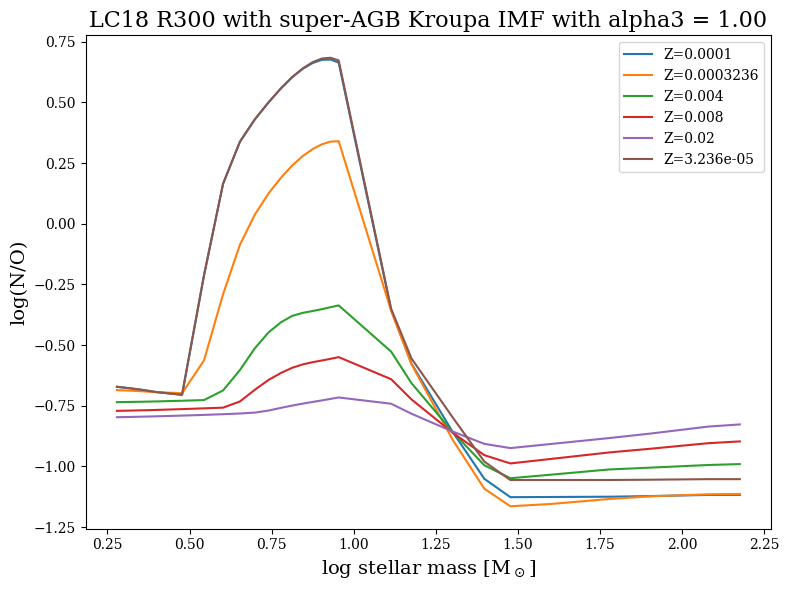

LC18 R300 with super-AGB | Z=0.0001 | pN=8.068e-05 | pO=1.057e-03 | log10(N/O)=-1.117
LC18 R300 with super-AGB | Z=0.0003236 | pN=8.433e-05 | pO=1.095e-03 | log10(N/O)=-1.113
LC18 R300 with super-AGB | Z=0.004 | pN=1.189e-04 | pO=1.162e-03 | log10(N/O)=-0.990
LC18 R300 with super-AGB | Z=0.008 | pN=1.641e-04 | pO=1.294e-03 | log10(N/O)=-0.897
LC18 R300 with super-AGB | Z=0.02 | pN=2.687e-04 | pO=1.804e-03 | log10(N/O)=-0.827
LC18 R300 with super-AGB | Z=3.236e-05 | pN=9.318e-05 | pO=1.051e-03 | log10(N/O)=-1.052
--------------------------------------------------------------------------------


In [12]:
alpha3 = 1.0  # high-mass slope for the Kroupa IMF; edit this value as needed
start_index = 5  # skip the lowest-mass points to match earlier plots

dataset_patterns = [
    ("LC18 R300 with super-AGB", '/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R300_sup_agb/*.txt',
     '/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300_sup_agb/*.txt'),
    # Add more (title, N_pattern, O_pattern) tuples here if you want to compare other grids in one run.
]

imf_results = {}
for title, pattern_N, pattern_O in dataset_patterns:
    paths_N = glob.glob(pattern_N)
    paths_O = glob.glob(pattern_O)
    if not paths_N or not paths_O:
        print(f"Skipping {title}: no matching files found.")
        continue

    results = plot_imf_weighted_NO_vs_mass(paths_N, paths_O, alpha3, title, start_index=start_index)
    imf_results[title] = results

    summaries = summarize_imf_weighted_yields(paths_N, paths_O, alpha3)
    for row in summaries:
        print(f"{title} | Z={row['label']} | pN={row['pN']:.3e} | pO={row['pO']:.3e} | log10(N/O)={row['log_NO']:.3f}")
    print('-' * 80)

In [13]:
# Consistency check: IMF weighting matches integrated yields for alpha3 = 2.30
test_alpha3 = 2.30
test_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R300_sup_agb/*.txt')
test_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300_sup_agb/*.txt')

max_abs_diff = 0.0
imf_func = get_kroupa_imf(test_alpha3)
for path_N, path_O in zip(sorted(test_paths_N), sorted(test_paths_O)):
    data_N = load_data_with_names(path_N)
    data_O = load_data_with_names(path_O)
    mass = np.asarray(data_N['mass'], dtype=float)
    mass_O = np.asarray(data_O['mass'], dtype=float)
    if not np.allclose(mass, mass_O):
        raise ValueError(f"Mass grids do not match for {path_N} and {path_O}.")

    ratio_data = imf_weighted_ratio_vs_mass(mass, data_N['N_eject_mass'], data_O['O_eject_mass'], imf_func=imf_func)
    finite = np.isfinite(ratio_data['log_NO'])
    if not finite.any():
        continue

    pN = imf_weighted_yield_from_table(mass, data_N['N_eject_mass'], imf_func=imf_func)
    pO = imf_weighted_yield_from_table(mass, data_O['O_eject_mass'], imf_func=imf_func)
    if not (np.isfinite(pN) and np.isfinite(pO) and pN > 0 and pO > 0):
        continue

    final_log_NO = ratio_data['log_NO'][finite][-1]
    integrated_log_NO = np.log10(pN / pO)
    diff = abs(final_log_NO - integrated_log_NO)
    max_abs_diff = max(max_abs_diff, diff)

print(f"Max |log(N/O)_cumulative - log(N/O)_integrated| for alpha3=2.30: {max_abs_diff:.3e}")
assert max_abs_diff < 1e-6, "Cumulative IMF weighting disagrees with the integrated yields."



Max |log(N/O)_cumulative - log(N/O)_integrated| for alpha3=2.30: 2.220e-16


In [14]:
# Validation: disabling IMF weighting reproduces the original pointwise log(N/O) curves
check_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_N_eject_mass_from_Limongi_R300_sup_agb/*.txt')
check_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables__2024/rearranged___/setllar_O_eject_mass_from_Limongi_R300_sup_agb/*.txt')

max_pointwise_diff = 0.0
for path_N, path_O in zip(sorted(check_paths_N), sorted(check_paths_O)):
    data_N = load_data_with_names(path_N)
    data_O = load_data_with_names(path_O)
    mass = np.asarray(data_N['mass'], dtype=float)
    if not np.allclose(mass, data_O['mass']):
        raise ValueError(f"Mass grids do not match for {path_N} and {path_O}.")

    ratio_pointwise = imf_weighted_ratio_vs_mass(
        mass,
        data_N['N_eject_mass'],
        data_O['O_eject_mass'],
        imf_func=lambda _: 1.0,
        weighting_mode='pointwise',
    )

    if ratio_pointwise['mass'].size == 0:
        continue

    N = np.asarray(data_N['N_eject_mass'], dtype=float)
    O = np.asarray(data_O['O_eject_mass'], dtype=float)
    with np.errstate(divide='ignore', invalid='ignore'):
        direct_log_NO = np.where((N > 0) & (O > 0), np.log10(N / O), np.nan)

    order = np.argsort(mass)
    mass_sorted = mass[order]
    direct_sorted = direct_log_NO[order]

    mask = np.isfinite(ratio_pointwise['log_NO'])
    if not mask.any():
        continue

    comp_mass = ratio_pointwise['mass'][mask]
    comp_log = ratio_pointwise['log_NO'][mask]
    direct_at_mass = direct_sorted[mask]

    diff = np.nanmax(np.abs(comp_log - direct_at_mass))
    if np.isnan(diff):
        diff = 0.0
    max_pointwise_diff = max(max_pointwise_diff, diff)

print(f"Max |log(N/O)_pointwise - log(N/O)_original|: {max_pointwise_diff:.3e}")
assert max_pointwise_diff < 1e-12, 'Pointwise IMF-free curves should match the original plot.'

Max |log(N/O)_pointwise - log(N/O)_original|: 0.000e+00
